<a href="https://colab.research.google.com/github/taslimmuhammed/pytorch/blob/main/pytorch_nn_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn


In [ ]:
n_samples = 1000

X,y = make_circles(n_samples, noise=0.03, random_state=42)
X.shape, y.shape

((1000, 2), (1000,))

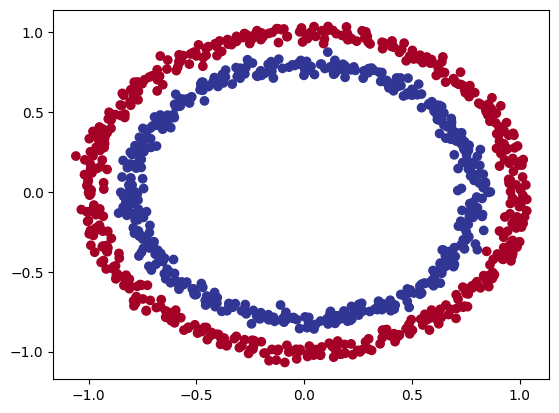

In [ ]:
plt.scatter(X[:,0],X[:,1],c = y, cmap=plt.cm.RdYlBu)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
X = torch.from_numpy(X).type(torch.float).to(device)
y = torch.from_numpy(y).type(torch.float).to(device)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [ ]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(5,1)
    ).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.01)

In [ ]:
X_train.shape, y_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [ ]:
y_pred = model_0(X_train)
torch.round(torch.sigmoid(y_pred[:5])),y[:5]

(tensor([[0.],
         [0.],
         [0.],
         [0.],
         [1.]], device='cuda:0', grad_fn=<RoundBackward0>),
 tensor([1., 1., 1., 1., 0.], device='cuda:0'))

**result array should be single dimension**\
rounding is done to so that\
y>=0.5 => 1\
y <0.5 =>0

In [ ]:
epochs = 100

for epoch in range(epochs):
  model_0.train()
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_logits, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if(epoch%10)==0:
    print(loss.item())

0.69359290599823
0.6935597062110901
0.6935296654701233
0.6935021877288818
0.693477213382721
0.6934545040130615
0.6934337615966797
0.6934147477149963
0.6933973431587219
0.6933814287185669


In [ ]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("already downloaded")
else:
  request  = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)
from helper_functions import plot_decision_boundary, plot_predictions

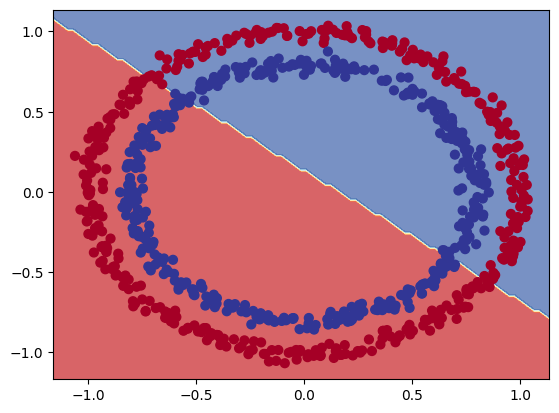

In [ ]:
plot_decision_boundary(model_0, X_train, y_train)

# Non Linear Model

In [ ]:
model_1 = nn.Sequential(
    nn.Linear(2,10),
    nn.ReLU(),
    nn.Linear(10,10),
    nn.ReLU(),
    nn.Linear(10,1), # output layer cannot be relu
).to(device)
model_1

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_1.parameters(),lr=0.1)

In [ ]:
epochs=2000
for epoch in range(epochs):
  model_1.train()
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_logits, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if(epoch%200)==0:
    print(loss.item())

0.7056794762611389
0.6905790567398071
0.68340665102005
0.6627840399742126
0.5956450700759888
0.4274608790874481
0.20471696555614471
0.09583788365125656
0.05302458256483078
0.03530877083539963


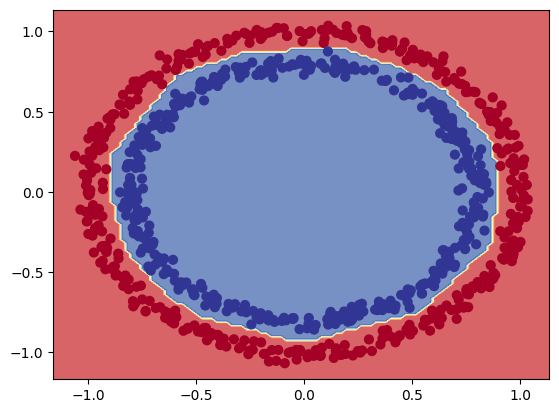

In [ ]:
plot_decision_boundary(model_1, X_train, y_train)